In [36]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from sqlalchemy import create_engine, inspect, func


In [37]:
import numpy as np
import pandas as pd

In [38]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [39]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import Column, Integer, String, Numeric, Text, Float

In [40]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [41]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [42]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [43]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [44]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [45]:
session.query(Measurement).limit(2).all()


In [46]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [47]:
Station.__table__.columns.values()

[Column('id', INTEGER(), table=<station>, primary_key=True, nullable=False),
 Column('station', TEXT(), table=<station>),
 Column('name', TEXT(), table=<station>),
 Column('latitude', FLOAT(), table=<station>),
 Column('longitude', FLOAT(), table=<station>),
 Column('elevation', FLOAT(), table=<station>)]

In [48]:

Measurement.__table__.columns.values()

[Column('id', INTEGER(), table=<measurement>, primary_key=True, nullable=False),
 Column('station', TEXT(), table=<measurement>),
 Column('date', TEXT(), table=<measurement>),
 Column('prcp', FLOAT(), table=<measurement>),
 Column('tobs', FLOAT(), table=<measurement>)]

In [49]:
last_date=session.query(Measurement.date).\
order_by(Measurement.date.desc()).first()

for date in last_date:
    split_last_date=date.split('-')
    
split_last_date
last_year=int(split_last_date[0]); last_month=int(split_last_date[1]); last_day=int(split_last_date[2])


# Exploratory Climate Analysis

In [1]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [50]:
query_date = dt.date(last_year, last_month, last_day) - dt.timedelta(days=365)
print(query_date)


2016-08-23


In [51]:
last_year = dt.date(2019, 8, 23) - dt.timedelta(days=365)
print(last_year)

2018-08-23


In [52]:
last_12months_prcp=session.query(Measurement.date, Measurement.prcp).\
filter(Measurement.date>=query_date).\
order_by(Measurement.date).all()

In [53]:
df_last_12months_prcp=pd.DataFrame(last_12months_prcp,columns=['date', 'prcp'])
df_last_12months_prcp.set_index('date', inplace=True)

In [54]:
df_last_12months_prcp=df_last_12months_prcp.dropna()


In [55]:
df_last_12months_prcp.head()


,prcp
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,0.02
2016-08-23,1.79


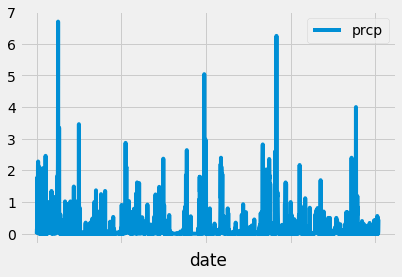

In [56]:
df_last_12months_prcp.plot()
plt.show()

In [57]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df_last_12months_prcp.describe()


,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [58]:
# Design a query to show how many stations are available in this dataset?
total_stations=session.query(Measurement.station).group_by(Measurement.station).count()
total_stations



9

In [59]:
active_stations=session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station). \
order_by(func.count(Measurement.station).desc()).all()
active_stations


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [60]:
sel = [Measurement.station, 
       func.min(Measurement.tobs),
      func.max(Measurement.tobs),
    func.avg(Measurement.tobs)]

min_max_avg_tmp=session.query(*sel).group_by(Measurement.station). \
order_by(func.count(Measurement.station).desc()).first()
min_max_avg_tmp


('USC00519281', 54.0, 85.0, 71.66378066378067)

In [1]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


In [61]:
top_station=min_max_avg_tmp[0]
last_12months_tobs_top_station=session.query(Measurement.date, Measurement.tobs).\
filter(Measurement.station==top_station).\
filter(Measurement.date>=query_date).\
order_by(Measurement.date).all()

In [62]:
df_top_station_tobs_last_12months=pd.DataFrame(last_12months_tobs_top_station,columns=['date','tobs'])


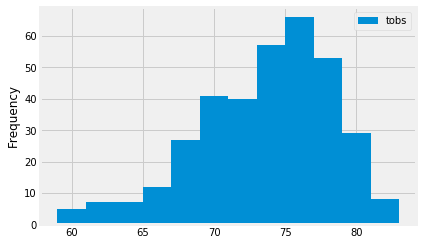

In [33]:
df_top_station_tobs_last_12months.plot.hist(bins=12)
plt.show()